The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [136]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!


In [137]:
import pandas as pd
nobel = pd.read_csv('data/nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [138]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

What is the most commonly awarded gender and birth country?

In [139]:

nobel_gender = nobel['sex'].value_counts()
top_gender = nobel_gender.idxmax()
top_gender

'Male'

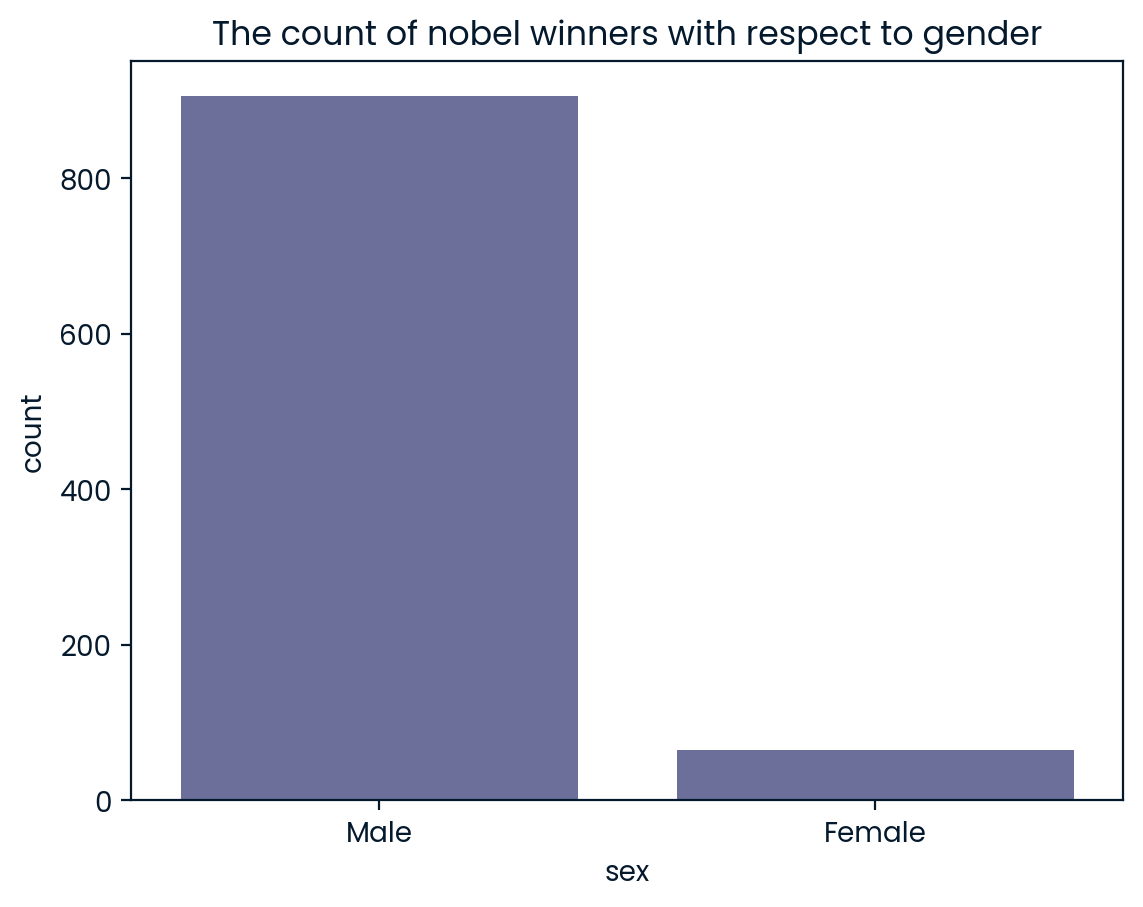

In [140]:
# Let us also do a plot for this since the project is based on data visualization

import matplotlib.pyplot as plt


g = sns.countplot(x = 'sex', data = nobel)

g.set_title("The count of nobel winners with respect to gender")

plt.show()

In [141]:
nobel_country = nobel['birth_country'].value_counts()
top_country = nobel_country.idxmax()
top_country

'United States of America'

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [164]:
# for this question we need to create a category column called decade
# There is a better alternative other than 

def decade(x):
    if  x>= 1900 and x<=1909:
        return "1900"
    elif x>= 1910 and x<=1919:
        return "1910"
    elif  x>= 1920 and x<=1929:
        return "1920"
    elif  x>= 1930 and x<=1939:
        return "1930"
    elif  x>= 1940 and x<=1949:
        return "1940"
    elif  x>= 1950 and x<=1959:
        return "1950"
    elif  x>= 1960 and x<=1969:
        return "1960"
    elif  x>= 1970 and x<=1979:
        return "1970"
    elif  x>= 1980 and x<=1989:
        return "1980"
    elif  x>= 1990 and x<=1999:
        return "1990"
    elif  x>= 2000 and x<=2009:
        return "2000"
    elif  x>= 2010 and x<=2019:
        return "2010"
    else:
        return "2020"

nobel["decade"]  = nobel['year'].apply(decade)

nobel["decade"] = nobel["decade"].astype("int")

nobel.head()



      

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [165]:
nobel_usa = nobel[ nobel["birth_country"] == 'United States of America']

nobel_usa["decade"].value_counts(normalize = True)

2000    0.178694
1990    0.144330
2010    0.130584
1970    0.113402
1980    0.106529
1950    0.072165
1960    0.072165
2020    0.061856
1930    0.048110
1940    0.044674
1920    0.013746
1910    0.010309
1900    0.003436
Name: decade, dtype: float64

In [166]:
max_decade_usa = int(nobel_usa["decade"].value_counts().idxmax())
max_decade_usa

2000

#### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [167]:
female_nobels = nobel[ nobel['sex']=='Female']

summary_data = pd.pivot_table(data = female_nobels, index = ['decade','category'], aggfunc = 'count', values = 'sex')

# remove zero values

summary_data.idxmax()

sex    (2010, Peace)
dtype: object

In [162]:
max_female_dict = {summary_data.idxmax()[0][0]:summary_data.idxmax()[0][1]}

max_female_dict

{2010: 'Peace'}

#### Who was the first woman to receive a Nobel Prize, and in what category?

In [168]:
female_sorted = female_nobels.sort_values(by = 'year')

first_woman_name = female_sorted.head(n=1)['full_name']
first_woman_category = female_sorted.head(n=1)['category']

print("First Woman to win the Nobel Prize: {}".format(first_woman_name))
print("In the Category: {}".format(first_woman_category))

First Woman to win the Nobel Prize: 19    Marie Curie, née Sklodowska
Name: full_name, dtype: object
In the Category: 19    Physics
Name: category, dtype: object


In [169]:
repeated = nobel[ nobel.duplicated(subset = 'full_name')]

repeated = repeated.dropna(subset = 'full_name', axis = 0) #drop rows based on this column

repeat_list = list(repeated['full_name'].unique()) # we must pass the unique function to ensure the values are returned do not contain any duplicates

repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']